# Predictive Modelling on Diabetes Dataset

In [1]:
# loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df =pd.read_csv("datasets/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.rename(columns ={'Pregnancies':'Preg','BloodPressure':'BP','SkinThickness':'ST','DiabetesPedigreeFunction':'DPF'},inplace=True)

In [5]:
df.head()

,Preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
# checking for the missing data

In [8]:
df.isnull().sum()

Preg       0
Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64

In [9]:
# so no null values are present

In [10]:
# let's see the number of classes present

In [11]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
# 1-> diabetes
# 0-> no diabetes

In [13]:
# check for zero values in data except for (outcome and pregnancies)

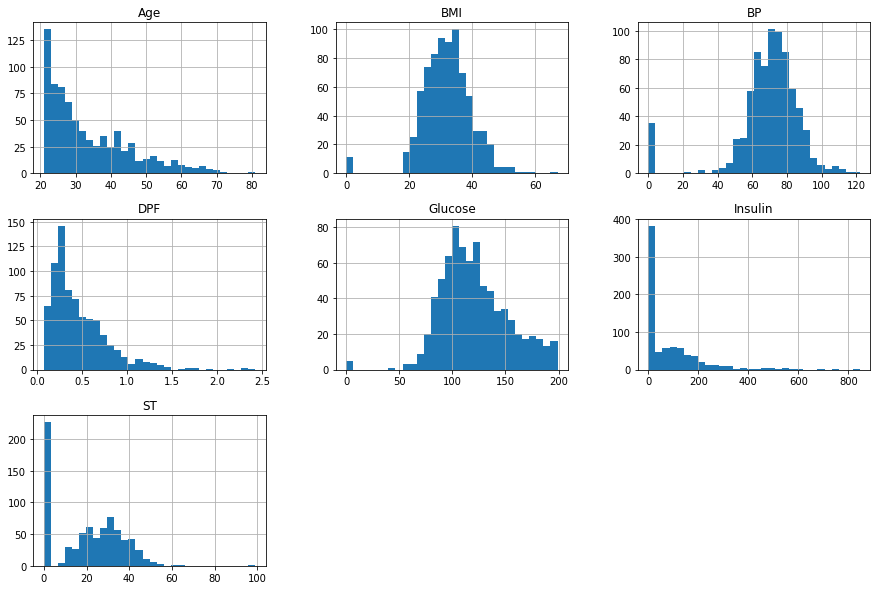

In [14]:
df.iloc[:,1:-1].hist(bins=30,figsize=(15,10))
plt.show()

In [15]:
# we have some 0 values in :
# glucose , bmi , bp , insuline , st

In [16]:
# now we will see in terms of values
df.iloc[:,1:-1].isin([0]).sum()

Glucose      5
BP          35
ST         227
Insulin    374
BMI         11
DPF          0
Age          0
dtype: int64

In [17]:
# displaying the statitical information
df.iloc[:,1:-3].describe()

,Glucose,BP,ST,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [18]:
# here we can see the mean and the median values are almost similar 
#so replacing the 0 values with median values will be a great option

In [19]:
for col in ['Glucose','BP','ST','Insulin','BMI']:
    df[col] = df[col].replace({0:df[col].median()})

In [20]:
df.iloc[:,1:-3].isin([0]).sum()

Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
dtype: int64

In [21]:
# all 0s are replaced by the median values

In [22]:
df.head()

,Preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [23]:
# feature selection using random forest
from sklearn.ensemble import RandomForestClassifier

In [24]:
x =df.iloc[:,:-1].values

y =df.Outcome.values

In [25]:
rf = RandomForestClassifier(n_estimators=20,random_state=11)

In [26]:
rf.fit(x,y)

RandomForestClassifier(n_estimators=20, random_state=11)

In [27]:
f = rf.feature_importances_

In [28]:
f

array([0.08436737, 0.2622496 , 0.08832891, 0.07531785, 0.07419524,
       0.16156699, 0.11531117, 0.13866286])

In [29]:
for c,k in zip(df.columns[:-1],f):
    print(c," : ",k)

Preg  :  0.08436736633798786
Glucose  :  0.26224959641043205
BP  :  0.08832891400565966
ST  :  0.07531785366710277
Insulin  :  0.07419524299420481
BMI  :  0.16156699241852504
DPF  :  0.11531117262837175
Age  :  0.13866286153771615


In [30]:
# ab jiska score zyada hoga ham vo column le lenge

In [31]:
df_new = df[['Glucose','BMI','Age','DPF','Insulin']]

In [32]:
df_new.shape

(768, 5)

In [33]:
#split data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(df_new.values,df.Outcome.values,test_size=.2,random_state=12)

In [36]:
xtrain.shape

(614, 5)

In [37]:
# feature scaling

In [38]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()

In [39]:
std_train = std.fit_transform(xtrain)

In [40]:
std_test = std.transform(xtest)

In [41]:
std_train.shape

(614, 5)

In [42]:
# logistic regression

In [44]:
log = LogisticRegression(C=10)
log.fit(std_train,ytrain)

LogisticRegression(C=10)

In [45]:
train_score = log.score(std_train,ytrain)
test_score = log.score(std_test,ytest)

In [46]:
train_score

0.7719869706840391

In [47]:
test_score

0.7922077922077922

In [48]:
np.bincount(ytest)

array([99, 55], dtype=int64)

In [49]:
# checking the model performance using confusion matrix
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(ytest,log.predict(std_test))

array([[87, 12],
       [20, 35]], dtype=int64)

In [51]:
# true negative value -> 87
# true positive value -> 35
# false negative value -> 20
# false positive value -> 12

In [52]:
# SVM

In [53]:
clf_svm = SVC(kernel ='linear',C=10)

In [54]:
clf_svm.fit(std_train,ytrain)

SVC(C=10, kernel='linear')

In [55]:
train_score = clf_svm.score(std_train,ytrain)

test_score = clf_svm.score(std_test,ytest)

In [57]:
train_score

0.7833876221498371

In [58]:
test_score

0.7792207792207793

In [59]:
confusion_matrix(ytest,clf_svm.predict(std_test))

array([[87, 12],
       [22, 33]], dtype=int64)

In [60]:
#knn

In [61]:
knn =KNeighborsClassifier(n_neighbors=3)

In [63]:
knn.fit(std_train,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [64]:
confusion_matrix(ytest,knn.predict(std_test))

array([[83, 16],
       [20, 35]], dtype=int64)